<a href="https://colab.research.google.com/github/selinb75/Konut-Fiyat-Projesi/blob/main/Yenii_pynb_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np

from IPython.display import Image
import pandas as pd
import collections
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder #etiketleme işlemleri
from google.colab import files #dosya yükleme kütüphanesi
import io #dosya okuma
import matplotlib.pyplot as plt #veri görselleştirme kütüphanesi
import seaborn as sns # gelişmiş süslü grafikler için
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #lineer regresyon
from sklearn.metrics import mean_squared_error, r2_score #lineer regresyon için
from sklearn.cluster import KMeans #kümeleme algortşması için
uploaded = files.upload()
df1 = pd.read_csv("home_price.csv")


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# 'Tapu_Durumu' VE Takas sütununu sildim cok fazla eksik veri var
df1 = df1.drop('Tapu_Durumu', axis=1)
df1 = df1.drop('Takas', axis=1)
df1 = df1.drop('Yatırıma_Uygunluk', axis=1)
# 'Oda_Sayısı' sütunundaki boş değerleri mod ile doldurma


In [ ]:
df1.isnull().sum()

,0
Net_Metrekare,0
Brüt_Metrekare,0
Oda_Sayısı,260
Bulunduğu_Kat,2297
Eşya_Durumu,7398
Binanın_Yaşı,0
Isıtma_Tipi,0
Fiyat,0
Şehir,0
Binanın_Kat_Sayısı,0


In [ ]:
df1.isnull().mean() * 100

,0
Net_Metrekare,0.000000
Brüt_Metrekare,0.000000
Oda_Sayısı,1.279150
Bulunduğu_Kat,11.300797
Eşya_Durumu,36.396733
Binanın_Yaşı,0.000000
Isıtma_Tipi,0.000000
Fiyat,0.000000
Şehir,0.000000
Binanın_Kat_Sayısı,0.000000


In [ ]:
for column in df1.columns:
    unique_values = df1[column].unique()
    unique_values_str = sorted(list(unique_values.astype(str)))
    n = 10  # Gösterilecek maksimum eleman sayısı
    displayed_values = unique_values_str[:n]  # İlk N elemanı al
    print(f"{column} ({len(unique_values_str)}): {displayed_values} {'...' if len(unique_values_str) > n else ''}")

Net_Metrekare (504): [np.str_('0'), np.str_('1'), np.str_('10'), np.str_('100'), np.str_('1000'), np.str_('1009'), np.str_('101'), np.str_('1014'), np.str_('102'), np.str_('103')] ...
Brüt_Metrekare (634): [np.str_('100.0'), np.str_('1000.0'), np.str_('101.0'), np.str_('1010.0'), np.str_('1015.0'), np.str_('1017.0'), np.str_('102.0'), np.str_('10284.0'), np.str_('103.0'), np.str_('1035.0')] ...
Oda_Sayısı (17): [np.str_('1.0'), np.str_('10.0'), np.str_('11.0'), np.str_('12.0'), np.str_('2.0'), np.str_('2.5'), np.str_('3.0'), np.str_('3.5'), np.str_('4.0'), np.str_('4.5')] ...
Bulunduğu_Kat (38): [np.str_('1.Kat'), np.str_('10.Kat'), np.str_('11.Kat'), np.str_('12.Kat'), np.str_('13.Kat'), np.str_('14.Kat'), np.str_('15.Kat'), np.str_('16.Kat'), np.str_('17.Kat'), np.str_('18.Kat')] ...
Eşya_Durumu (3): [np.str_('Boş'), np.str_('Eşyalı'), np.str_('nan')] 
Binanın_Yaşı (9): [np.str_('0 (Yeni)'), np.str_('1'), np.str_('11-15'), np.str_('16-20'), np.str_('2'), np.str_('21 Ve Üzeri'), np.st

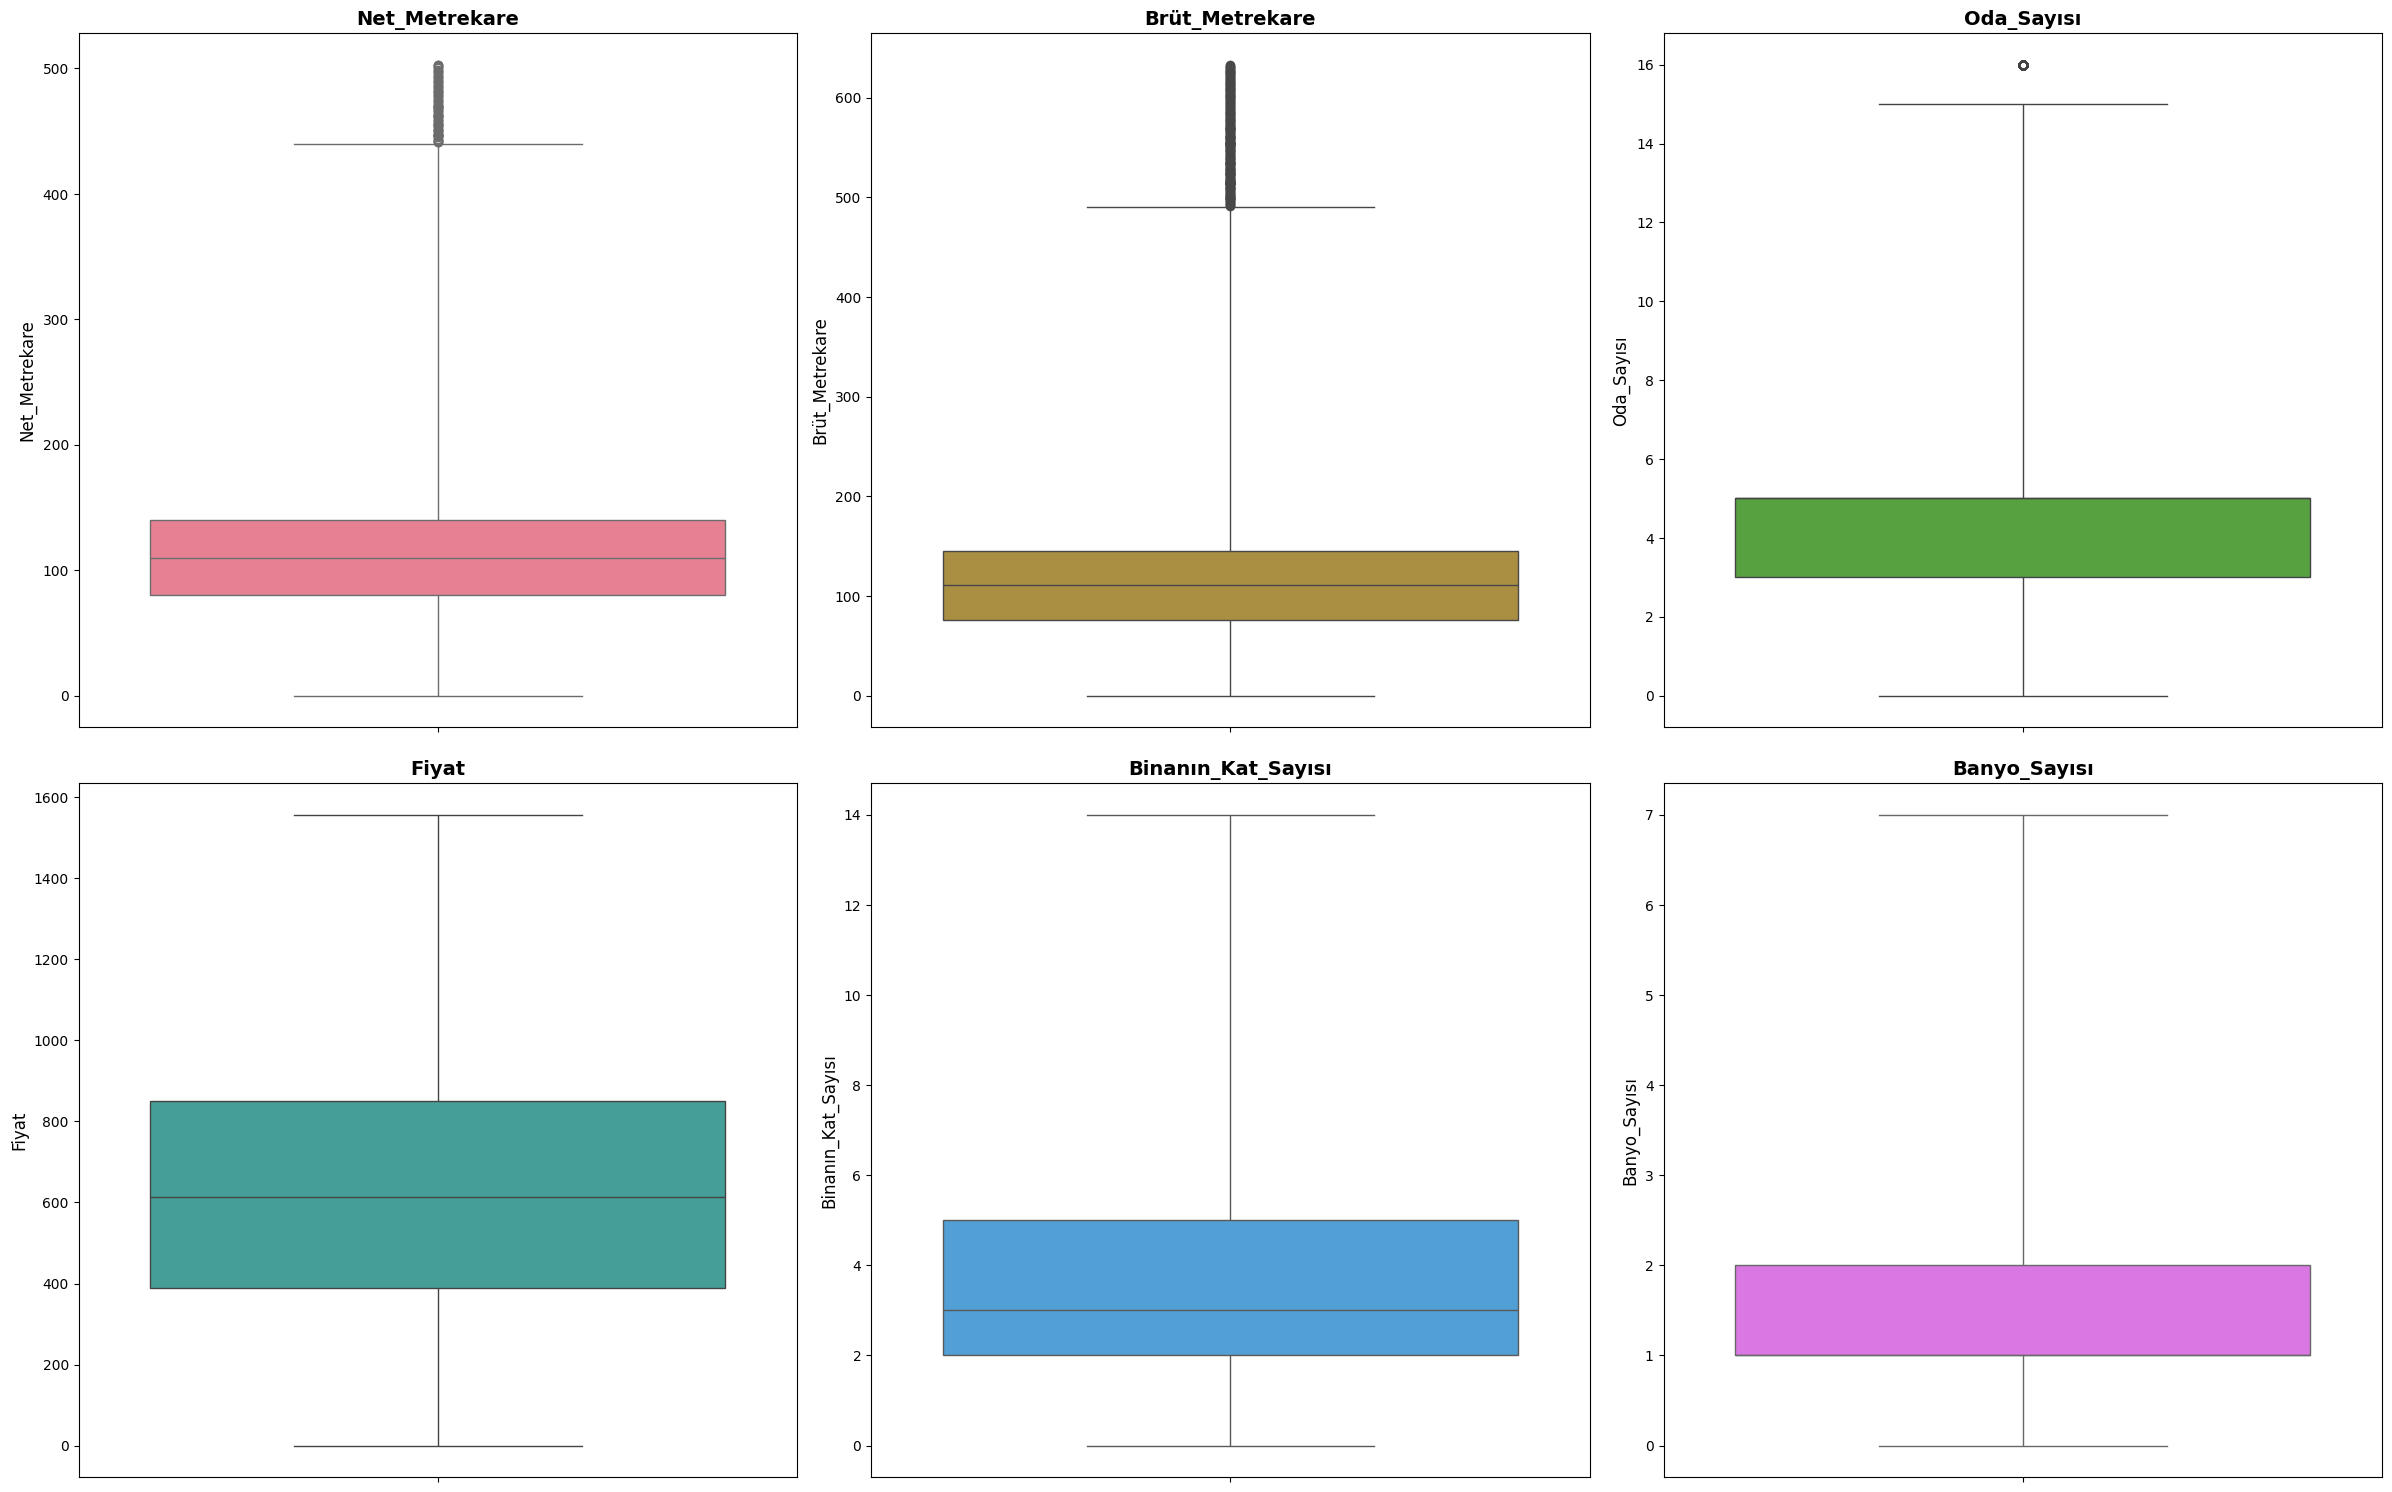

In [ ]:
veri = df1

selected_columns = veri.select_dtypes(include=['number']).columns.tolist()

label_encoder = LabelEncoder()

for column in selected_columns:
    veri[column] = label_encoder.fit_transform(veri[column])

# Plot sayısını belirleyip subplotları ayarlayalım
fig, axes = plt.subplots(nrows=int(np.ceil(len(selected_columns)/3)), ncols=3, figsize=(24, 5 * int(np.ceil(len(selected_columns)/2))))

# Renk paleti seçimi
palette = sns.color_palette("husl", len(selected_columns))

# Boxplotları çizelim
axes = axes.flatten()
for i, col in enumerate(selected_columns):
    sns.boxplot(y=col, data=veri, ax=axes[i], color=palette[i], whis=5)
    axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Kullanılmayan subplotları kaldıralım
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Grafik düzenini iyileştirelim
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=2.0)
plt.show()

/tmp/ipython-input-7-2677117778.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts.index, y=val_counts.values, ax=axes[i], palette='husl')
/tmp/ipython-input-7-2677117778.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts.index, y=val_counts.values, ax=axes[i], palette='husl')
/tmp/ipython-input-7-2677117778.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts.index, y=val_counts.values, ax=axes[i], palette='husl')
/tmp/ipython-input-7-2677117778.py:14: FutureWarning: 

Passing `palette` without ass

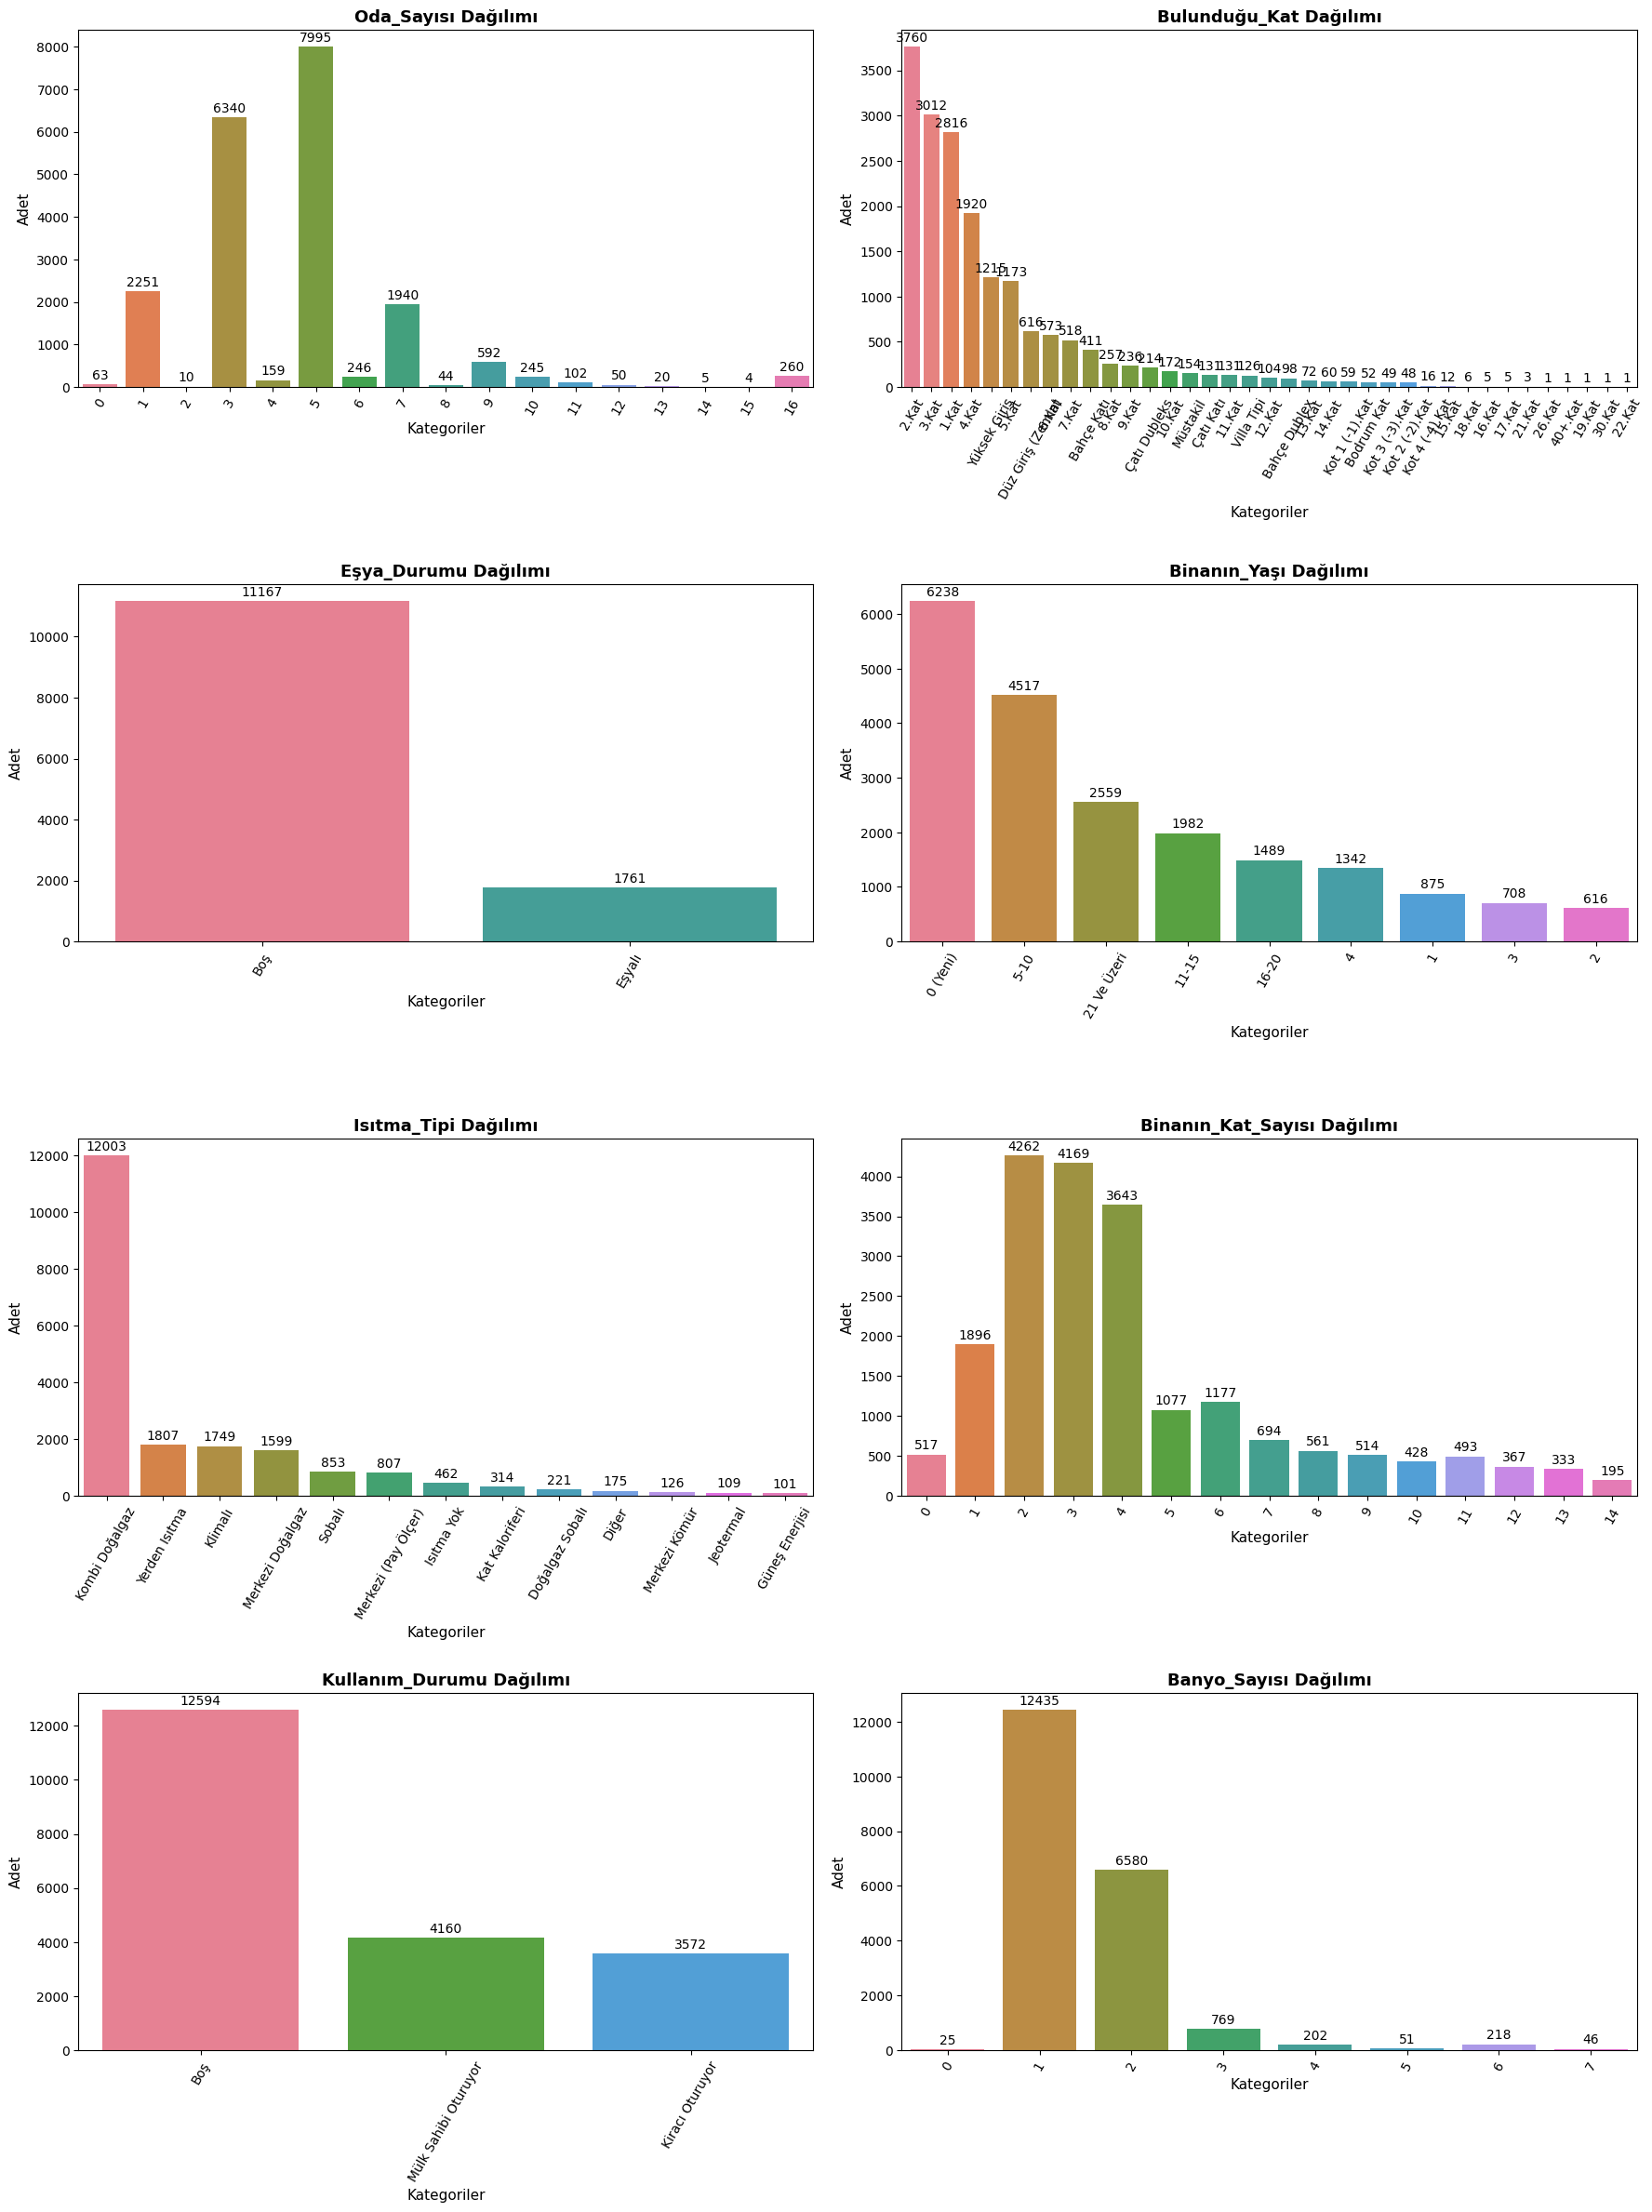

In [ ]:
unique_counts = df1.nunique()

# Özgün veri sayısı 100 ve altında olan sütunları seçelim
categorical_columns = unique_counts[unique_counts <= 50].index.tolist()

n_cols = 2
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*9, n_rows*6))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    val_counts = df1[column].value_counts()
    sns.barplot(x=val_counts.index, y=val_counts.values, ax=axes[i], palette='husl')
    axes[i].set_title(f'{column} Dağılımı', fontsize=13, fontweight='bold')
    axes[i].set_xlabel("Kategoriler", fontsize=11)
    axes[i].set_ylabel("Adet", fontsize=11)
    axes[i].tick_params(axis='x', rotation=60)

    # Her sütunun üzerine değerleri ekleyelim
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),
                         textcoords='offset points')

# Kullanılmayan subplotları kaldıralım
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=2.5)
plt.show()


In [ ]:
def outlier_suppression(df1):
    numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
    for sutun in numerical_cols:
        # Q1, Q3 ve IQR hesapla
        Q1 = df1[sutun].quantile(0.20)
        Q3 = df1[sutun].quantile(0.80)
        IQR = Q3 - Q1

        # Sınırları belirle
        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        # Clip ile outlierları baskıla
        df1[sutun] = df1[sutun].clip(lower=alt_sinir, upper=ust_sinir)

        print(f"\n{sutun} sütunu için:")
        print(f"Alt sınır: {alt_sinir:.2f}")
        print(f"Üst sınır: {ust_sinir:.2f}")
    return df1


In [ ]:
def categorical_counts_graph_with_legend(val_counts, table_name, percent_info, x_text, y_text, x_size, y_size, rotation, color_palette='viridis'):
    """
    Args:
    - val_counts (pd.Series): Kategorik değerlerin sayımlarını içeren seri.
    - table_name (str): Grafik başlığı.
    - percent_info (boolean): Değerlerin yüzdeliklerinin gösterilmesi.
    - x_label (str): X ekseni etiketi.
    - y_label (str): Y ekseni etiketi.
    - fig_width (float): Grafik genişliği.
    - fig_height (float): Grafik yüksekliği.
    - rotation (int): X ekseni etiket dönüş açısı.
    """

    # Renk paletini seç
    if color_palette in plt.colormaps():
        colors = plt.cm.get_cmap(color_palette, len(val_counts))(range(len(val_counts)))
    else:
        try:
            colors = sns.color_palette(color_palette, len(val_counts))
        except:
            colors = plt.cm.viridis(range(len(val_counts)))  # Varsayılan olarak viridis

    category_mapping = {i + 1: category for i, category in enumerate(val_counts.index)}
    plt.figure(figsize=(x_size, y_size))
    ax = plt.bar(range(1, len(val_counts) + 1), val_counts, color=colors, edgecolor='black')

    # Her çubuğun üstüne sayıları ve yüzdeleri
    if percent_info:
        total = val_counts.sum()
        for i, count in enumerate(val_counts):
            percentage = f"{(count / total) * 100:.2f}%"
            plt.text(i + 1, count + total * 0.01, f"{count}\n({percentage})", ha='center', va='bottom', fontsize=10)


    plt.title(table_name, fontsize=16, pad=20)
    plt.xlabel(x_text, fontsize=12)
    plt.ylabel(y_text, fontsize=12)
    plt.xticks(range(1, len(val_counts) + 1), range(1, len(val_counts) + 1), rotation=rotation, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    legend_text = split_legend_text(category_mapping)
    plt.gcf().text(1.02, 0.5, legend_text, fontsize=10, va='center', transform=plt.gcf().transFigure, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

    plt.tight_layout()
    plt.show()

In [ ]:
def remove_outliers(df1, cols, threshold=1.5):
    for col in cols:
        Q1 = df1[col].quantile(0.05)
        Q3 = df1[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    return df1


In [ ]:
def split_legend_text(category_mapping, max_lines=40, padding=4):
    """
    Legend içeriğini orantılı bir şekilde hizalayarak sütunlara böler.

    :param category_mapping: Kategori eşleşmelerini içeren sözlük.
    :param max_lines: Her sütunun maksimum satır sayısı.
    :param padding: Sütunlar arasındaki boşluk miktarı.
    :return: Orantılı hizalanmış legend metni.
    """
    lines = [f"{num}: {category}" for num, category in category_mapping.items()]

    # Kaç sütun gerektiğini hesapla
    num_columns = (len(lines) // max_lines) + (1 if len(lines) % max_lines else 0)
    col_length = (len(lines) + num_columns - 1) // num_columns  # Her sütunun satır sayısı

    # Sütunları oluştur
    columns = [lines[i:i + col_length] for i in range(0, len(lines), col_length)]

    # Tüm sütunları eşit uzunluğa getirmek için eksik olanları boş string ile tamamla
    max_col_length = max(len(col) for col in columns)
    for col in columns:
        while len(col) < max_col_length:
            col.append("")  # Boş string ekleyerek sütun uzunluklarını eşitle

    # Maksimum genişlikleri belirle
    max_widths = [max(len(item) for item in col) for col in columns]

    # Yan yana hizalanmış sütunları oluştur
    formatted_text = "\n".join(["".join(item.ljust(max_widths[idx] + padding) for idx, item in enumerate(row))
                                for row in zip(*columns)])

    return formatted_text

/tmp/ipython-input-9-826027361.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_palette, len(val_counts))(range(len(val_counts)))


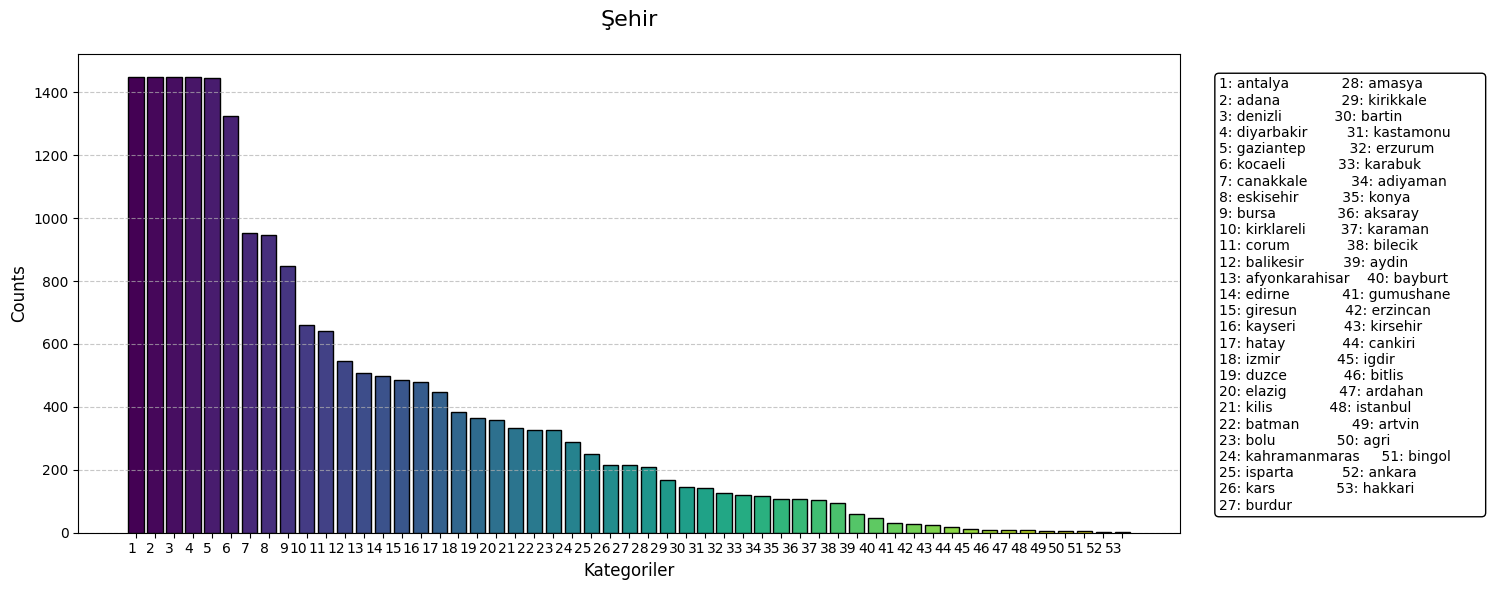

In [ ]:
categorical_counts_graph_with_legend(val_counts = df1["Şehir"].value_counts(),
                         table_name = "Şehir",
                         percent_info= False,
                         x_text ="Kategoriler",
                         y_text = "Counts",
                         x_size = 12,
                         y_size = 6,
                         rotation = 0)

In [ ]:
def data_filling(data):
    data["Oda_Sayısı"] = data["Oda_Sayısı"].fillna(data["Oda_Sayısı"].median())
    data["Bulunduğu_Kat"] = data["Bulunduğu_Kat"].replace(np.nan, "Diğer")
    data["Eşya_Durumu"] = data["Eşya_Durumu"].replace(np.nan, "Belirtilmemiş")
    data["Banyo_Sayısı"] = data["Banyo_Sayısı"].fillna(data["Banyo_Sayısı"].median())
    return data

df1 = data_filling(df1)

In [ ]:
df1["Net_Brut_Orani"] = df1["Net_Metrekare"] / df1["Brüt_Metrekare"]

binayasi_map = {
    "0 (Yeni)": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5-10": 7,
    "11-15": 13, "16-20": 18, "21 Ve Üzeri": 25
}
df1["Binanın_Yaşı"] = df1["Binanın_Yaşı"].map(binayasi_map)
df1["Banyo_Oda_Orani"] = df1["Banyo_Sayısı"] / df1["Oda_Sayısı"]

In [ ]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
df1 = remove_outliers(df1, numerical_cols)

In [ ]:
X = df1.drop("Fiyat", axis=1)
y = df1["Fiyat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
!pip install xgboost lightgbm catboost

from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
xgb_params = {'n_estimators': 851, 'max_depth': 10, 'learning_rate': 0.01910914940853801, 'reg_alpha': 0.21101141709867102, 'reg_lambda': 0.6632043417202894, 'colsample_bytree': 0.6768844754170326}
lgb_params = {'n_estimators': 493, 'max_depth': 13, 'learning_rate': 0.037210620524286864, 'num_leaves': 165, 'reg_alpha': 0.589282800542733, 'reg_lambda': 0.2925406387129855, 'colsample_bytree': 0.5455735559047308}
cat_params = {'iterations': 1079, 'depth': 9, 'learning_rate': 0.07283738391178775, 'l2_leaf_reg': 3.935447352110951}

xgb_model = XGBRegressor(**xgb_params)
lgb_model = lgb.LGBMRegressor(**lgb_params)
catboost_model = CatBoostRegressor(**cat_params)

models = [("xgb", xgb_model), ("lgb", lgb_model), ("catboost", catboost_model)]

In [ ]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Gerekli kütüphaneleri import edin
from sklearn.model_selection import KFold # KFold sınıfını import ettik
# TargetEncoder importunu bu hücreye taşıdık
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error, r2_score # Skor hesaplamaları için import edin
import numpy as np # np'yi import ettiğinizden emin olun
import lightgbm as lgb # lgb'yi import ettiğinizden emin olun
columns = ["Isıtma_Tipi", "Bulunduğu_Kat", "Şehir", "Kullanım_Durumu",
           "Eşya_Durumu"]

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Model skorlarını saklamak için sözlük
model_scores = {name: {'r2': [], 'rmse': []} for name, _ in models}

"""
Target Encoding ve Özellik çıkarımı veri sızıntısı oluşturmaması için kfold içerisinde yapıldı.
Fiyat verisinde sağa çarpıklık gözlendiği için karekök dönüşümü yapıldı.
"""
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Karekök dönüşümü
    y_fold_train_sqrt = np.sqrt(y_fold_train)
    y_fold_val_sqrt = np.sqrt(y_fold_val)

    # Target Encoding
    encoder = TargetEncoder(cols=columns)
    X_fold_train = encoder.fit_transform(X_fold_train, y_fold_train_sqrt)
    X_fold_val = encoder.transform(X_fold_val)

    # Fiyat_MetreKare hesaplaması
    X_fold_train["Fiyat_MetreKare"] = y_fold_train / X_fold_train["Net_Metrekare"]
    X_fold_val["Fiyat_MetreKare"] = y_fold_val / X_fold_val["Net_Metrekare"]

    # Medyanları her sütun için hesapla ve NaN/inf'leri medyanla doldur
    median_values = X_fold_train[["Fiyat_MetreKare"]].median()
    X_fold_train[["Fiyat_MetreKare"]] = X_fold_train[["Fiyat_MetreKare"]].apply(
        lambda col: col.replace([np.inf, -np.inf], median_values[col.name])
    )

    median_values = X_fold_val[["Fiyat_MetreKare"]].median()
    X_fold_val[["Fiyat_MetreKare"]] = X_fold_val[["Fiyat_MetreKare"]].apply(
        lambda col: col.replace([np.inf, -np.inf], median_values[col.name])
    )

    # Outlier baskılama
    X_fold_train = outlier_suppression(X_fold_train)

    for name, model in models:
        if name == 'catboost':
            model.fit(X_fold_train, y_fold_train_sqrt,
                      eval_set=[(X_fold_val, y_fold_val_sqrt)],
                      early_stopping_rounds=100, verbose=False)
        elif name == 'xgb':
            model.fit(X_fold_train, y_fold_train_sqrt,
                      eval_set=[(X_fold_val, y_fold_val_sqrt)],
                      verbose=0)
        elif name == 'lgb':
            model.fit(X_fold_train, y_fold_train_sqrt,
                      eval_set=[(X_fold_val, y_fold_val_sqrt)],
                      callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)])

        # Tahminler
        y_pred_sqrt = model.predict(X_fold_val)
        y_pred = np.power(y_pred_sqrt, 2)  # Karekök dönüşümünü tersine çevir

        # Model değerlendirme
        r2 = r2_score(y_fold_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_fold_val, y_pred))

        model_scores[name]['r2'].append(r2)
        model_scores[name]['rmse'].append(rmse)

# Model sonuçlarını tabloya dökelim
model_results = []

for name, scores in model_scores.items():
    mean_r2 = np.mean(scores['r2'])
    std_r2 = np.std(scores['r2'])
    mean_rmse = np.mean(scores['rmse'])
    std_rmse = np.std(scores['rmse'])

    model_results.append({
        "Model": name,
        "Mean R²": mean_r2,
        "Std R²": std_r2,
        "Mean RMSE": mean_rmse,
        "Std RMSE": std_rmse
    })

# Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(model_results)
results_df


Net_Metrekare sütunu için:
Alt sınır: -30.00
Üst sınır: 250.00

Brüt_Metrekare sütunu için:
Alt sınır: -55.00
Üst sınır: 281.00

Oda_Sayısı sütunu için:
Alt sınır: 0.00
Üst sınır: 8.00

Bulunduğu_Kat sütunu için:
Alt sınır: 21.81
Üst sınır: 26.59

Eşya_Durumu sütunu için:
Alt sınır: 22.09
Üst sınır: 27.18

Binanın_Yaşı sütunu için:
Alt sınır: -27.00
Üst sınır: 45.00

Isıtma_Tipi sütunu için:
Alt sınır: 18.87
Üst sınır: 32.06

Şehir sütunu için:
Alt sınır: 15.02
Üst sınır: 34.92

Binanın_Kat_Sayısı sütunu için:
Alt sınır: -4.00
Üst sınır: 12.00

Kullanım_Durumu sütunu için:
Alt sınır: 24.46
Üst sınır: 25.74

Banyo_Sayısı sütunu için:
Alt sınır: -0.50
Üst sınır: 3.50

Net_Brut_Orani sütunu için:
Alt sınır: 0.69
Üst sınır: 1.31

Banyo_Oda_Orani sütunu için:
Alt sınır: -0.10
Üst sınır: 0.70

Fiyat_MetreKare sütunu için:
Alt sınır: -2.19
Üst sınır: 13.78
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true`

,Model,Mean R²,Std R²,Mean RMSE,Std RMSE
0,xgb,0.978804,0.002069,47.117213,2.283475
1,lgb,0.985124,0.002096,39.418713,2.758284
2,catboost,0.989576,0.001973,32.918479,3.191005


/tmp/ipython-input-21-2418545413.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")


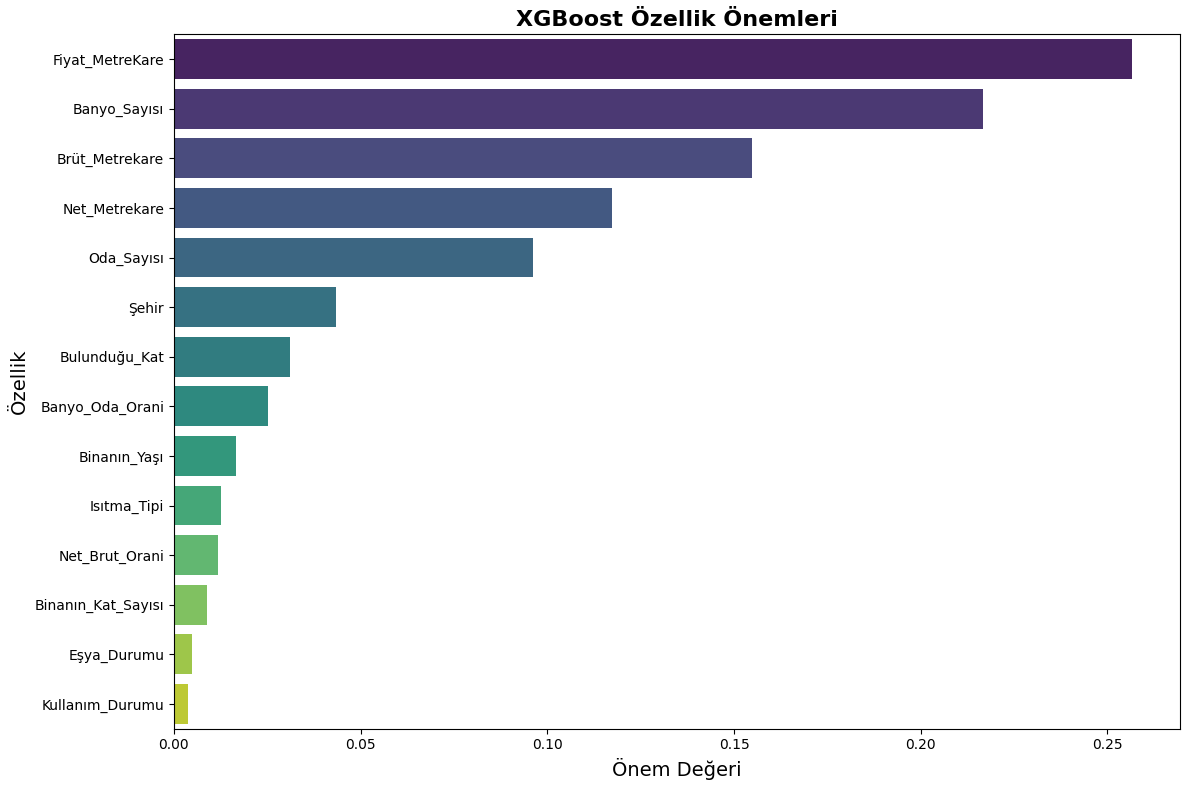

/tmp/ipython-input-21-2418545413.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")


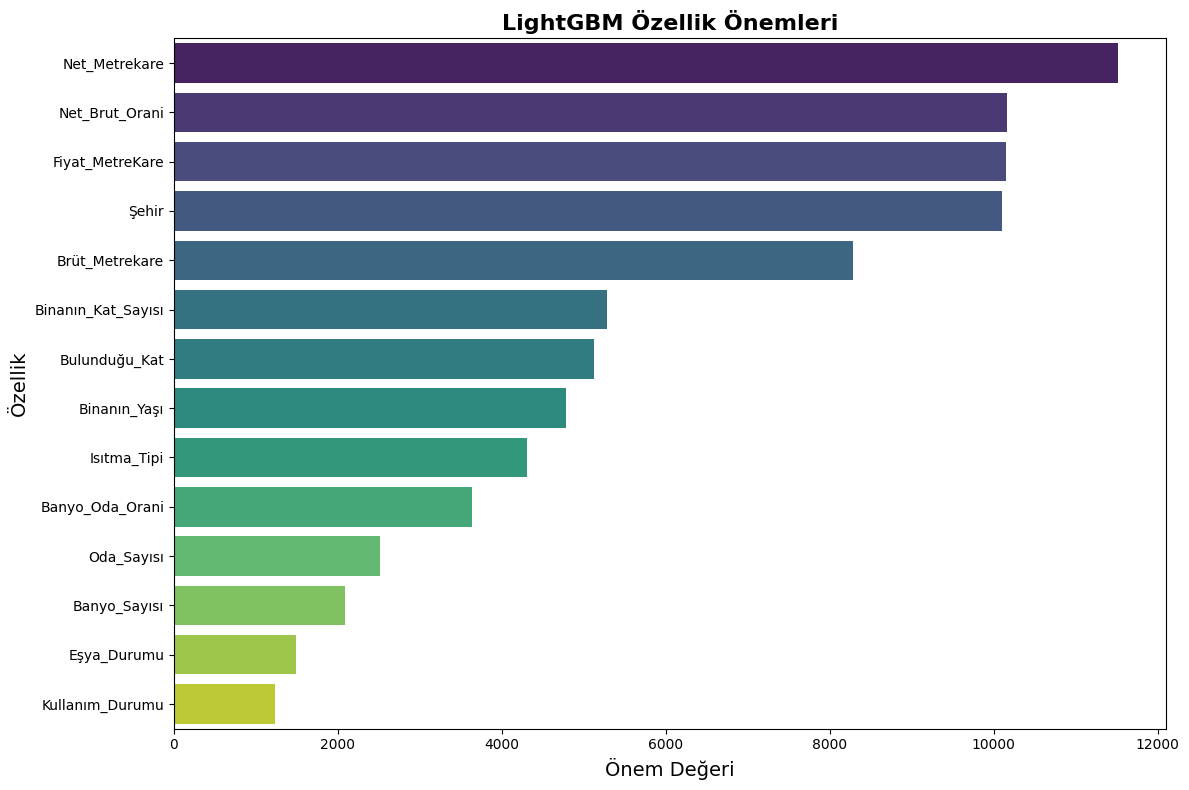

/tmp/ipython-input-21-2418545413.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")


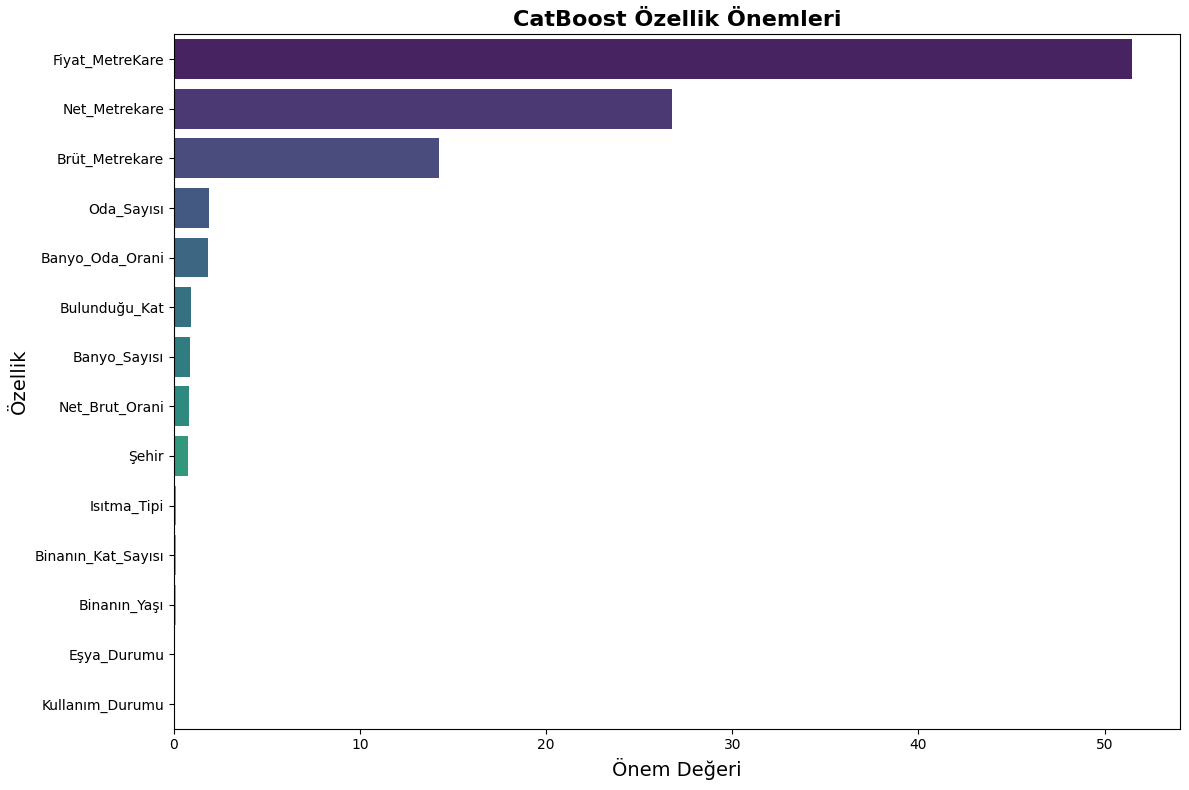

In [ ]:
def plot_feature_importance(model, X_train, title="Özellik Önemleri"):
    # CatBoost için get_feature_importance() kullanılır, diğerleri için feature_importances_
    if hasattr(model, "get_feature_importance"):
        importances = model.get_feature_importance()
    else:
        importances = model.feature_importances_

    feat_importance = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Barplot çizimi
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Önem Değeri", fontsize=14)
    plt.ylabel("Özellik", fontsize=14)
    plt.tight_layout()
    plt.show()

plot_feature_importance(xgb_model, X_fold_train, title="XGBoost Özellik Önemleri")
plot_feature_importance(lgb_model, X_fold_train, title="LightGBM Özellik Önemleri")
plot_feature_importance(catboost_model, X_fold_train, title="CatBoost Özellik Önemleri")

In [ ]:
df1.columns

Index(['Net_Metrekare', 'Brüt_Metrekare', 'Oda_Sayısı', 'Bulunduğu_Kat',
       'Eşya_Durumu', 'Binanın_Yaşı', 'Isıtma_Tipi', 'Fiyat', 'Şehir',
       'Binanın_Kat_Sayısı', 'Kullanım_Durumu', 'Banyo_Sayısı',
       'Net_Brut_Orani', 'Banyo_Oda_Orani'],
      dtype='object')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install streamlit catboost joblib

In [ ]:
# After training the catboost_model in the KFold loop (in a previous cell), save it:
catboost_model.save_model("catboost_model.cbm")